### Exercise 1

In the following we have a list of numbers that represent the balances of various bank accounts, to show this data to the to the client we need them to be shown as a percentage, convert all the numbers to a percentage and print the new list

In [1]:
GREEN='\x1b[1;32m'
RED='\x1b[1;31m'
WHITE='\x1b[0;37m'
YELLOW='\x1b[0;33m'
BLUE='\x1b[0;34m'

def transform_balances_percentages(balances):
    return [round(balance*100,2) for balance in balances]

In [2]:
accounts = [0.12, 0.90, 0.89, 0.076, -0.0087, 0.78, 0.65]
expected_percentages=[12.0,90.0,89.0,7.6,-0.87,78.0,65.0]
percentage_accounts = transform_balances_percentages(accounts)

print(percentage_accounts)
assert percentage_accounts == expected_percentages, f"expected {expected_percentages}"


[12.0, 90.0, 89.0, 7.6, -0.87, 78.0, 65.0]


### Exercise 2

We are testing a new security verification system, for which the user must enter his password and enter a verification code, for which he has 3 attempts, if he fails in all three attempts, we must print `Your account has been blocked`, in case you enter the correct data in the three attempts you have, we will print `Your data was verified`, use the input function so that the user enters his password and his verification code

In [3]:
### Input data sample:
### password = !@#123
### verification_code = 9898

data = [
    {"password": '!@#123',
    "verification_code": '9898'},
    {"password": '123asg',
    "verification_code": '1111'}
]

def verification_password_and_ver_code(password,verification_code,data):
    
    if len(password)==6 and len(verification_code)==4 and verification_code.isdigit():
        for dat in data:
            if (dat.get('password') == password) and (dat.get('verification_code') == verification_code):      
                return True
    else:
        print(RED+'Incorrect data. verify your information'+WHITE) 
    return False


def exercise_2():

    number_intent = 0
    estado = False
    while  number_intent < 3 and estado != True:
        
        get_password = input("Enter your password: ")
        get_v_code = input("Enter your verificacion code: ")

        if verification_password_and_ver_code(get_password,get_v_code,data): 
            estado = True
        else:
            print("Intentos restantes",3-(number_intent+1))
            estado = False
        number_intent += 1
    return GREEN+"Your data was verified" if estado else RED+"Your account has been blocked"



print(exercise_2())
print(WHITE)



Incorrect data. verify your information
Intentos restantes 2
Incorrect data. verify your information
Intentos restantes 1
Your data was verified



In [45]:
validaton_true=verification_password_and_ver_code('!@#123','9898',data)
assert validaton_true==True, "Expected True to entry data valid"

#### Exercise 3

Moon loves lucky numbers very much. Everyone knows that lucky numbers are positive integers whose decimal register contains only the lucky digits 4 and 7. For example, the numbers 47, 744, 4 are lucky and 5, 17, 467 are not.

Given an integer and positive number determine if it is a lucky number, if the number is lucky it prints `Congratulations your number is lucky`, if it is not it prints `You have bad luck!`

In [48]:
number = input("Please enter a number: ")

def validation_number (number):
    if number.isdigit() and int(number)>0:
        return True
    return False


def number_is_lucky(number):
    if not validation_number(number): return "You must enter a valid data"
    lucky = False
    for digit in number:
        if digit not in ['4','7']:
            lucky = False
            break  
        else:
            lucky = True
    return GREEN+"Congratulations your number is lucky!" if lucky else RED+"You have bad luck!"

print(number_is_lucky(number)+WHITE)

You must enter a valid data


In [49]:
assert validation_number('-1') == False, "Expected False for negative numbers"
assert validation_number('dfs4s') == False, "Expected False for values that are not numbers"
assert validation_number('454') == True, " Expected True for values that are numbers"
result=number_is_lucky('47')
assert result == GREEN+"Congratulations your number is lucky!", "Expected Congratulations your number is lucky"
result=number_is_lucky('5')
assert result== RED+"You have bad luck!", "Expected You have bad luck!"
result=number_is_lucky('-100')
assert result== "You must enter a valid data", "Expected You must enter a valid data"
result=number_is_lucky('0')
assert result== "You must enter a valid data", "Expected You must enter a valid data"

## Exercise 4
If you have ever seen the series The Big Bang Theory you will have heard of the game: rock, paper, scissors, lizard, spock, and if you don't know the rules we present them below:

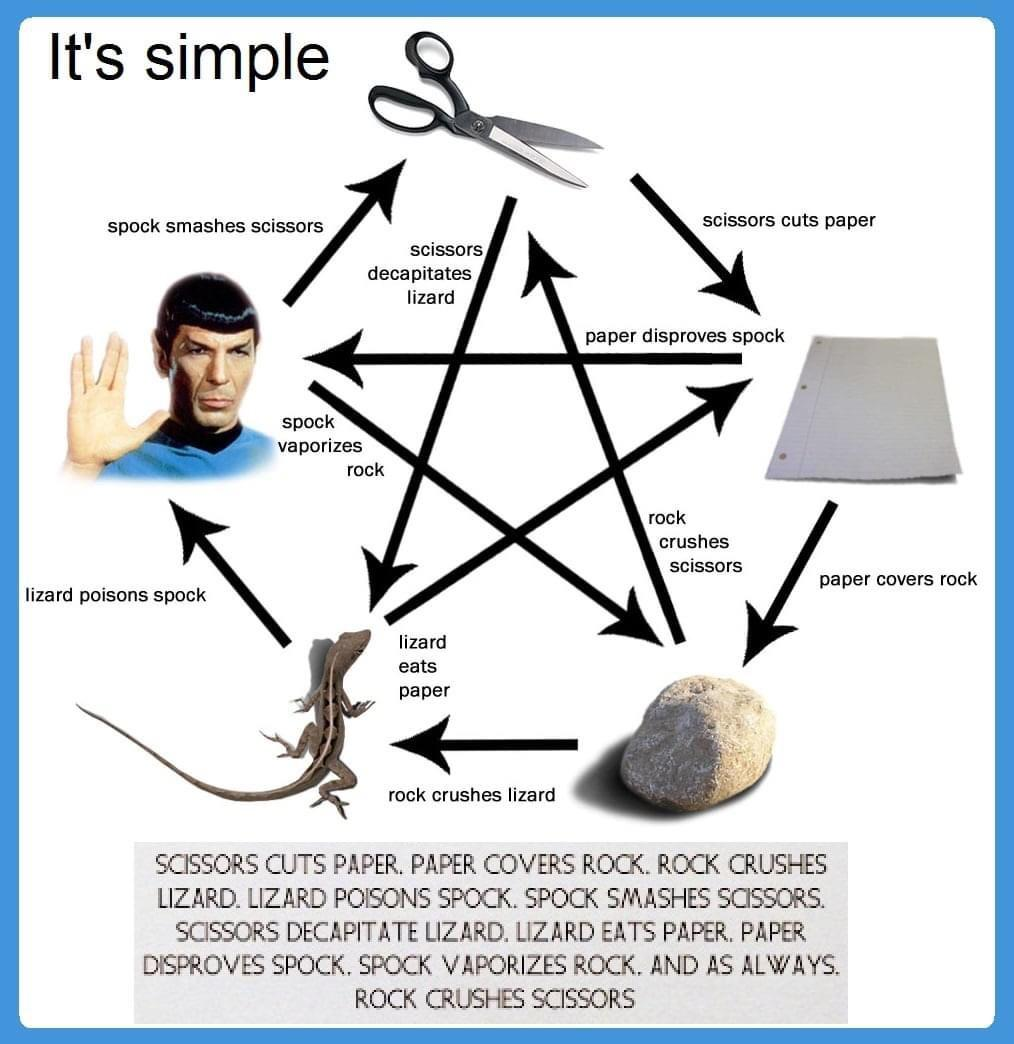

what we will do is implement a basic version of the game in the next cell, you will receive two entries that will be `player_1` and `player_2` in that order, for the moment consider that they can only enter one of the valid options as listed above, print who won based on the game's rules

In [57]:
winners={
    'rock': [{'win': 'scissors','message':'Rock crushes Scissors'},
            {'win':'lizard', 'message':'Rock crushes Lizard'}],
    'scissors':[{'win': 'paper','message':'Scissors cuts Paper'},
            {'win':'lizard', 'message':'Scissors decapitates Lizard'}],
    'lizard':[{'win': 'paper','message':'Lizard eats Paper'},
            {'win':'spock', 'message':'Lizard poisons Spock'}],
    'paper':[{'win': 'rock','message':'Paper covers Rock'},
            {'win':'spock', 'message': 'Paper disproves Spock'}],
    'spock':[{'win': 'rock','message':'Spock vaporizes Rock'},
            {'win':'scissors', 'message': 'Spock smashes Scissors'}],
            
}

def validate_options(option1,option2):
    if option1 in winners and option2 in winners: return True
    return False

def winning_message(win,lose):
    message = ""
    for i in [0,1]:
        WINNER = winners.get(win)[i]
        if lose == WINNER.get('win'):
            message = WINNER.get('message')
    return BLUE+message+WHITE

def win(option1,option2):
    option1=option1.lower()
    option2=option2.lower()

    if not validate_options(option1,option2): return RED+"Enter valid options"+WHITE

    if option1 == option2: return BLUE+"Equal"+WHITE
    
    for i in [0,1]:
           
        if option1 in winners.get(option2)[i].get('win'):
            return GREEN+f'Player 2 Win ,  {winning_message(option2,option1)}'#win option2 lose option1
        else:
            return GREEN+f'Player 1 Win , {winning_message(option1,option2)}'#win option1 lose option2
            
Player_1 = input("Enter player 1 selection: ")
Player_2 = input("Enter player 2 selection: ")

print(win(Player_1,Player_2))


Enter valid options


In [55]:
assert win('rock','rock') == BLUE+"Equal"+WHITE, "Expected Equal"
option1='rock'
option2='lizard'
assert win(option1, option2) == GREEN+f'Player 1 Win , {winning_message(option1,option2)}' , "Expected Player 1 Win, because rock crushes lizard"
## Yoy must consider these as valid entries: rock, paper, scissors, lizard, spock
assert win('rock','sdfkjh') == RED+"Enter valid options"+WHITE , "Expected Enter valid options"

### Exercise 5

Scrabble is a game where players score points by spelling words. 

Words are scored by adding the point values ​​of each individual letter. 

Complete the method within the `Scrabble` class that, given a word, returns the total score of the word based on the following division of points:

```python
scores = {"a": 1, "c": 3, "b": 3, "e": 1, "d": 2, "g": 2,
         "f": 4, "i": 1, "h": 4, "k": 5, "j": 8, "m": 3,
         "l": 1, "o": 1, "n": 1, "q": 10, "p": 3, "s": 1,
         "r": 1, "u": 1, "t": 1, "w": 4, "v": 4, "y": 4,
         "x": 8, "z": 10}
```

In [36]:
class Scrabble:
    
    def __init__(self,scores):
        self.scores = scores
        
    def get_score(self, word):
        word = word.lower()
        score = 0
        for letter in word:
            if letter in self.scores.keys():
                score=score+self.scores.get(letter)
        return score

In [38]:
scores = {"a": 1, "c": 3, "b": 3, "e": 1, "d": 2, "g": 2,
         "f": 4, "i": 1, "h": 4, "k": 5, "j": 8, "m": 3,
         "l": 1, "o": 1, "n": 1, "q": 10, "p": 3, "s": 1,
         "r": 1, "u": 1, "t": 1, "w": 4, "v": 4, "y": 4,
         "x": 8, "z": 10}

game = Scrabble(scores)



assert game is not None, "Expected non-null object"
assert type(game) is Scrabble, f"Expected type {Scrabble}"

In [39]:
assert type(game.scores) is dict, f"Expected dict type for Scrabble's scores"
assert len(game.scores) == 26, f"Expected dict len is 28"

In [40]:
assert game.scores['c'] == 3, f'Expected value of 3 for key `c`'

In [41]:
word = "HOlla"
expected_score = 8
score = game.get_score("HOlla")
assert score == 8, f"Expected score for word {word} is {expected_score}"